# Challenge: Make Your Network
Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

In [73]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

In [99]:
# Import Perceptron.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [75]:
data=pd.read_csv('cleaned_heart_data.csv')

In [76]:
X=pd.read_csv('heart_cleaned.csv',index_col=0)
y=X['target']
X=X.drop(['target'],axis=1)
X.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,num_major_vessels,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,0,1,0,0,1


In [129]:
X.shape

(303, 19)

In [77]:
# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, y)))

Score: 0.47194719471947194


In [130]:
mlp1 = MLPClassifier(hidden_layer_sizes=(500,))

In [131]:
mlp1.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [132]:
mlp_score=cross_val_score(mlp,X,y, cv=9)
print('mlp score: {:.4} std: {:.4}'.format(mlp_score.mean(), mlp_score.std()))

mlp score: 0.8183 std: 0.07332


In [133]:
y.value_counts()/len(y)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [134]:
y_pred_mlp = mlp.predict(X)

In [135]:
print(classification_report(y, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       138
           1       0.86      0.88      0.87       165

   micro avg       0.86      0.86      0.86       303
   macro avg       0.86      0.86      0.86       303
weighted avg       0.86      0.86      0.86       303



# Model comparison

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import model_selection

In [140]:
#Let's see the accuracy scores for all of our models. 
print('\t   Accuracy\n\t score\t  std')
scoring = 'accuracy'

models = []
models.append(('0. MLP', MLPClassifier(hidden_layer_sizes=(1000,500))))
models.append(('1. KNN', KNeighborsClassifier()))
models.append(('2. LR', LogisticRegression()))
models.append(('3. SVC', SVC(kernel='rbf',C=1000,gamma=0.0001)))
models.append(('4. RF', RandomForestClassifier()))
models.append(('5. XGB',  XGBClassifier()))
models.append(('6. DTC',  DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 9, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X, y,
                                                cv = kfold, 
                                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

	   Accuracy
	 score	  std
0. MLP: 0.826797 (0.125200)
1. KNN: 0.543573 (0.122902)
2. LR: 0.771935 (0.119456)
3. SVC: 0.718855 (0.107227)
4. RF: 0.752327 (0.094879)
5. XGB: 0.764805 (0.111994)
6. DTC: 0.679838 (0.079381)


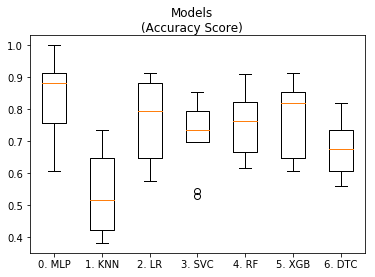

In [141]:
#Let's take a look at the Accuracy scores on a box plot
fig = plt.figure()
fig.suptitle('Models\n(Accuracy Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

MLP has the best score but it's not that stable compared to the rest of the models.